In [1]:
!pip install -r requirements.txt

  Using cached portpy_photon-0.0.4-py3-none-any.whl (47 kB)


In [1]:
import portpy_photon as pp
from low_dim_rt import LowDimRT
# %run ex_wavelet.py

In [2]:
# specify the patient data location
# you first need to download the patient database from the link provided in the PortPy GitHub page
data_dir = r'..\data'
# pick a patient from the existing patient list to get detailed info about the patient data (e.g., beams_dict, structures, ...)
patient_id = 'Lung_Patient_1'
# create my_plan object for the planner beams_dict and select among the beams which are 30 degrees apart
# for the customized beams_dict, you can pass the argument beam_ids
my_plan = pp.Plan(patient_id, data_dir)


Creating BEV..
Loading sparse influence matrix...
Done


In [5]:
# run IMRT fluence map optimization using a low dimensional subspace for fluence map compression
sol = pp.Optimize.run_IMRT_fluence_map_CVXPy(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Feb 24 11:33:01 PM: Your problem has 67514 variables, 27 constraints, and 0 parameters.
(CVXPY) Feb 24 11:33:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 24 11:33:01 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 24 11:33:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 24 11:33:01 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Fe

(CVXPY) Feb 24 11:36:18 PM: 21  3.2e-06  5.8e-03  1.9e-07  1.00e+00   6.273577567e+01   6.273542499e+01   1.4e-06  101.41
(CVXPY) Feb 24 11:36:20 PM: 22  1.5e-06  7.7e-03  6.1e-08  9.99e-01   4.395758464e+01   4.395742122e+01   6.5e-07  103.20
(CVXPY) Feb 24 11:36:23 PM: 23  4.7e-07  8.8e-03  1.1e-08  9.96e-01   3.320141719e+01   3.320136409e+01   2.1e-07  105.91
(CVXPY) Feb 24 11:36:24 PM: 24  2.8e-07  8.0e-03  5.0e-09  9.96e-01   3.132506782e+01   3.132503643e+01   1.2e-07  107.22
(CVXPY) Feb 24 11:36:25 PM: 25  2.2e-07  1.2e-02  3.4e-09  9.97e-01   3.074594995e+01   3.074592538e+01   9.6e-08  108.62
(CVXPY) Feb 24 11:36:28 PM: 26  6.5e-08  3.1e-02  5.7e-10  9.97e-01   2.930322448e+01   2.930321702e+01   2.9e-08  111.20
(CVXPY) Feb 24 11:36:29 PM: 27  2.6e-08  1.3e-01  1.5e-10  9.99e-01   2.895122182e+01   2.895121881e+01   1.2e-08  112.48
(CVXPY) Feb 24 11:36:31 PM: 28  1.9e-08  2.6e-01  9.0e-11  1.00e+00   2.888725356e+01   2.888725138e+01   8.5e-09  113.84
(CVXPY) Feb 24 11:36:33 

In [3]:
sol_low_dim = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

creating rinds of size [5, 5, 20, 30, 500] mm ..
rinds created!!
Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Feb 24 10:50:46 PM: Your problem has 69916 variables, 18 constraints, and 0 parameters.
(CVXPY) Feb 24 10:50:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 24 10:50:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 24 10:50:46 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 24

(CVXPY) Feb 24 10:56:27 PM: 20  7.9e-04  6.4e-01  8.3e-04  9.29e-01   2.945326838e+04   2.945316071e+04   3.5e-04  247.48
(CVXPY) Feb 24 10:56:31 PM: 21  6.8e-04  5.6e-01  6.8e-04  9.20e-01   2.882447878e+04   2.882438234e+04   3.0e-04  251.66
(CVXPY) Feb 24 10:56:35 PM: 22  6.5e-04  5.3e-01  6.3e-04  8.99e-01   2.867356050e+04   2.867346736e+04   2.9e-04  255.89
(CVXPY) Feb 24 10:56:40 PM: 23  5.5e-04  4.5e-01  5.0e-04  8.88e-01   2.825680347e+04   2.825672104e+04   2.4e-04  260.48
(CVXPY) Feb 24 10:56:44 PM: 24  4.9e-04  4.0e-01  4.3e-04  8.51e-01   2.816477821e+04   2.816470169e+04   2.2e-04  264.80
(CVXPY) Feb 24 10:56:48 PM: 25  4.3e-04  3.6e-01  3.6e-04  8.54e-01   2.807861990e+04   2.807855023e+04   1.9e-04  268.80
(CVXPY) Feb 24 10:56:52 PM: 26  3.9e-04  3.2e-01  3.1e-04  8.46e-01   2.804776939e+04   2.804770475e+04   1.7e-04  272.98
(CVXPY) Feb 24 10:56:56 PM: 27  3.5e-04  2.9e-01  2.7e-04  8.36e-01   2.805035981e+04   2.805029946e+04   1.6e-04  277.06
(CVXPY) Feb 24 10:57:01 

(CVXPY) Feb 24 11:02:21 PM: 88  5.3e-07  4.3e-04  8.7e-08  2.46e-01   3.786482509e+04   3.786482147e+04   2.3e-07  601.78
(CVXPY) Feb 24 11:02:28 PM: 89  4.9e-07  4.0e-04  7.9e-08  2.63e-01   3.795042727e+04   3.795042373e+04   2.1e-07  608.76
(CVXPY) Feb 24 11:02:35 PM: 90  4.5e-07  3.7e-04  7.3e-08  2.86e-01   3.802379531e+04   3.802379185e+04   2.0e-07  615.38
(CVXPY) Feb 24 11:02:41 PM: 91  4.1e-07  3.3e-04  6.4e-08  3.06e-01   3.812628986e+04   3.812628652e+04   1.8e-07  622.19
(CVXPY) Feb 24 11:02:48 PM: 92  3.7e-07  3.0e-04  5.8e-08  3.39e-01   3.821212436e+04   3.821212114e+04   1.6e-07  628.81
(CVXPY) Feb 24 11:02:55 PM: 93  3.4e-07  2.7e-04  5.1e-08  3.54e-01   3.829963196e+04   3.829962882e+04   1.5e-07  636.00
(CVXPY) Feb 24 11:03:02 PM: 94  3.1e-07  2.5e-04  4.6e-08  3.48e-01   3.838368891e+04   3.838368583e+04   1.4e-07  642.81
(CVXPY) Feb 24 11:03:09 PM: 95  2.8e-07  2.3e-04  4.2e-08  3.41e-01   3.846126482e+04   3.846126179e+04   1.2e-07  649.70
(CVXPY) Feb 24 11:03:16 

In [4]:
sol_low_dim_only = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK',
                                                         opt_params={'smoothness_weight': 0})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Feb 24 11:12:54 PM: Your problem has 69916 variables, 23 constraints, and 0 parameters.
(CVXPY) Feb 24 11:12:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 24 11:12:54 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 24 11:12:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 24 11:12:54 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Fe

(CVXPY) Feb 24 11:19:05 PM: 21  6.8e-04  5.5e-01  6.7e-04  9.20e-01   2.878204620e+04   2.878195047e+04   3.0e-04  257.31
(CVXPY) Feb 24 11:19:09 PM: 22  6.4e-04  5.2e-01  6.1e-04  8.98e-01   2.859388196e+04   2.859379045e+04   2.8e-04  261.44
(CVXPY) Feb 24 11:19:13 PM: 23  5.5e-04  4.5e-01  5.0e-04  8.84e-01   2.825279772e+04   2.825271555e+04   2.4e-04  265.84
(CVXPY) Feb 24 11:19:17 PM: 24  5.0e-04  4.1e-01  4.4e-04  8.52e-01   2.817710329e+04   2.817702602e+04   2.2e-04  269.97
(CVXPY) Feb 24 11:19:22 PM: 25  3.7e-04  3.1e-01  2.9e-04  8.54e-01   2.790837237e+04   2.790830994e+04   1.7e-04  274.53
(CVXPY) Feb 24 11:19:26 PM: 26  3.4e-04  2.8e-01  2.6e-04  8.26e-01   2.794551408e+04   2.794545574e+04   1.5e-04  278.88
(CVXPY) Feb 24 11:19:30 PM: 27  2.9e-04  2.4e-01  2.1e-04  8.16e-01   2.803637421e+04   2.803632112e+04   1.3e-04  283.09
(CVXPY) Feb 24 11:19:35 PM: 28  2.7e-04  2.2e-01  1.9e-04  8.10e-01   2.812629414e+04   2.812624449e+04   1.2e-04  287.36
(CVXPY) Feb 24 11:19:39 

(CVXPY) Feb 24 11:24:40 PM: 89  5.3e-07  4.4e-04  8.9e-08  2.46e-01   3.785207744e+04   3.785207378e+04   2.4e-07  592.58
(CVXPY) Feb 24 11:24:46 PM: 90  5.1e-07  4.2e-04  8.4e-08  2.62e-01   3.789528396e+04   3.789528035e+04   2.3e-07  598.70
(CVXPY) Feb 24 11:24:52 PM: 91  4.6e-07  3.8e-04  7.6e-08  2.72e-01   3.798944550e+04   3.798944199e+04   2.1e-07  604.76
(CVXPY) Feb 24 11:24:58 PM: 92  4.3e-07  3.5e-04  7.0e-08  2.98e-01   3.805513952e+04   3.805513608e+04   1.9e-07  611.11
(CVXPY) Feb 24 11:25:05 PM: 93  3.8e-07  3.1e-04  5.9e-08  3.19e-01   3.818811933e+04   3.818811606e+04   1.7e-07  617.31
(CVXPY) Feb 24 11:25:11 PM: 94  3.3e-07  2.7e-04  5.0e-08  3.67e-01   3.831781098e+04   3.831780787e+04   1.5e-07  623.67
(CVXPY) Feb 24 11:25:17 PM: 95  3.1e-07  2.5e-04  4.7e-08  3.76e-01   3.837344301e+04   3.837343995e+04   1.4e-07  629.91
(CVXPY) Feb 24 11:25:23 PM: 96  2.8e-07  2.3e-04  4.2e-08  3.71e-01   3.846052437e+04   3.846052137e+04   1.2e-07  636.00
(CVXPY) Feb 24 11:25:30 

(CVXPY) Feb 24 11:31:56 PM: 157 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202480345e+04   4.202479996e+04   2.0e-09  1028.72
(CVXPY) Feb 24 11:32:03 PM: 158 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202481822e+04   4.202481473e+04   2.0e-09  1035.61
(CVXPY) Feb 24 11:32:10 PM: 159 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482568e+04   4.202482219e+04   2.0e-09  1042.64
(CVXPY) Feb 24 11:32:18 PM: 160 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482661e+04   4.202482312e+04   2.0e-09  1050.12
(CVXPY) Feb 24 11:32:25 PM: 161 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482848e+04   4.202482499e+04   2.0e-09  1057.27
(CVXPY) Feb 24 11:32:32 PM: 162 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482943e+04   4.202482594e+04   2.0e-09  1064.77
(CVXPY) Feb 24 11:32:39 PM: 163 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482943e+04   4.202482594e+04   2.0e-09  1072.08
(CVXPY) Feb 24 11:32:46 PM: 164 4.5e-09  3.7e-06  7.0e-10  2.43e-01   4.202482943e+04   4.202482594e+04   2.0e-09  1079.06
(CVXPY) Feb 24 1

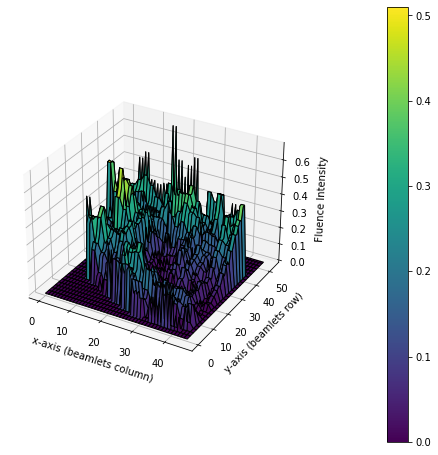

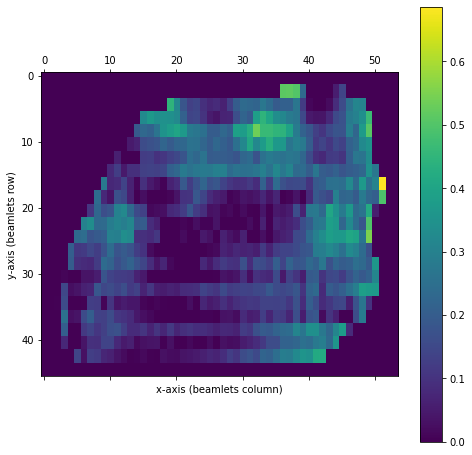

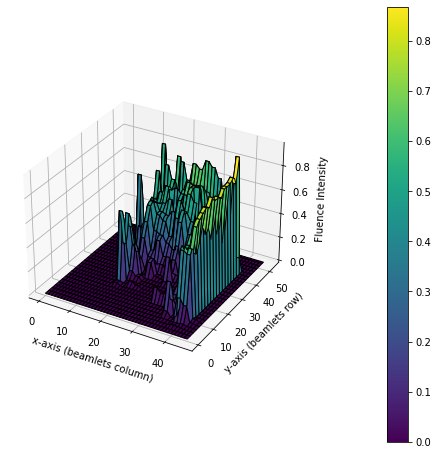

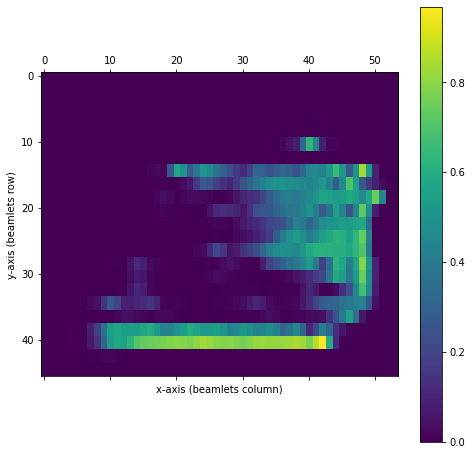

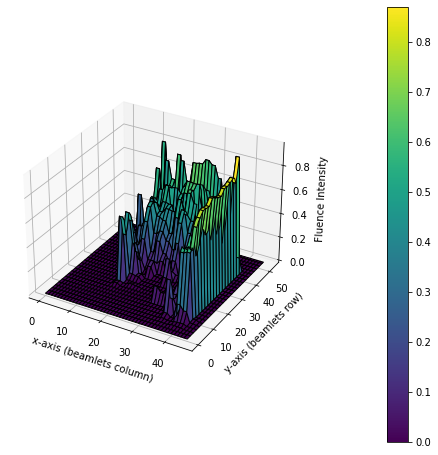

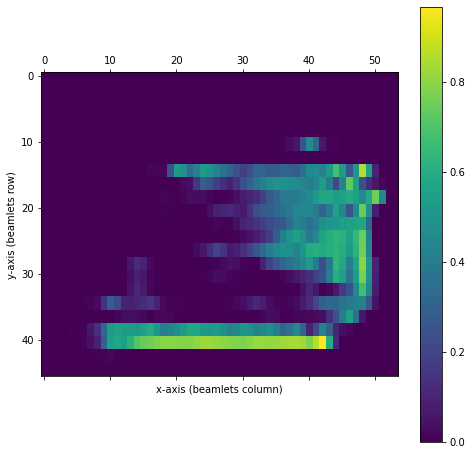

In [6]:
# plot fluence 3D and 2D
pp.Visualize.plot_fluence_3d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim_only, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim_only, beam_id=0)

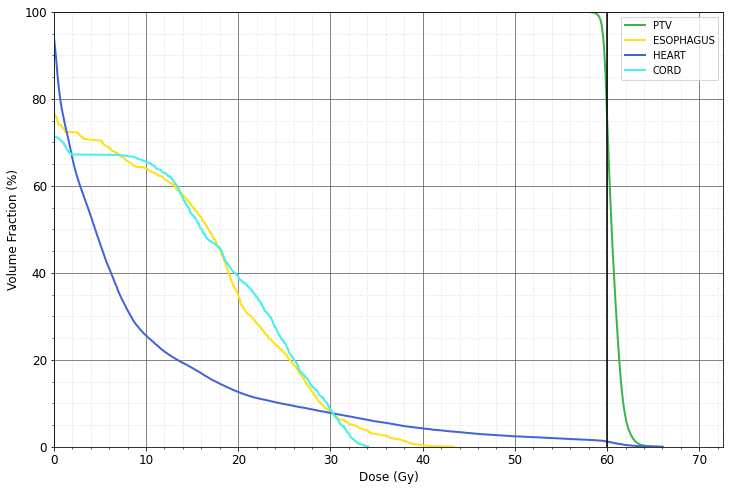

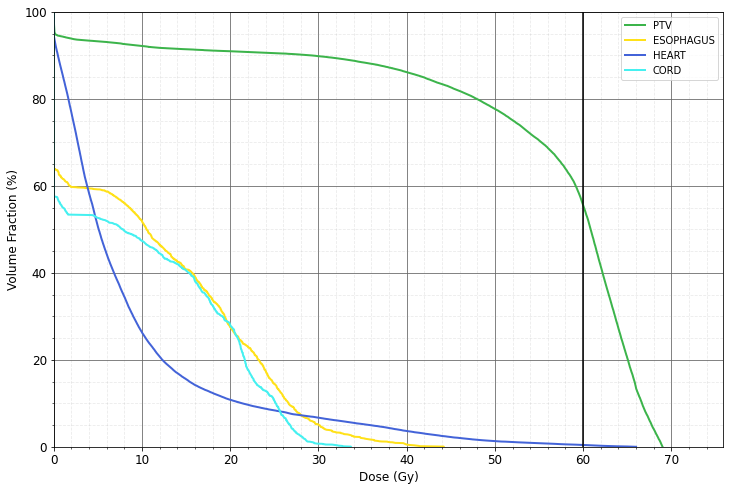

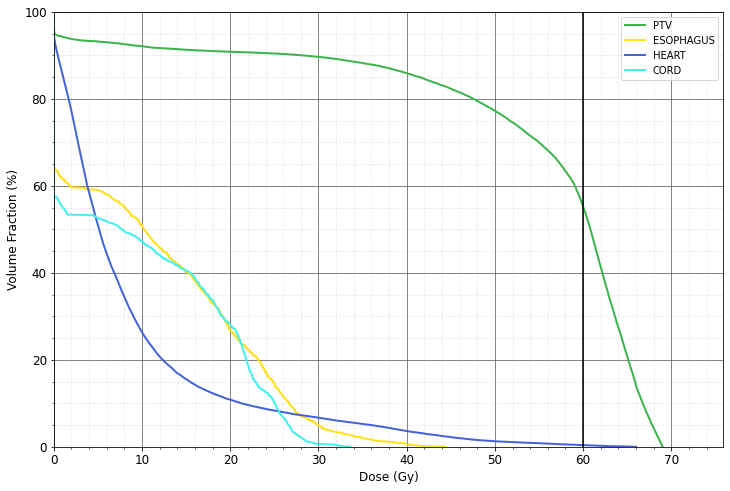

In [7]:
# plot DVH for the structures in the given list. Default dose_1d is in Gy and volume is in relative scale(%).
structs = ['PTV', 'ESOPHAGUS', 'HEART', 'CORD']
my_plan.plot_dvh(sol=sol, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim_only, structs=structs)

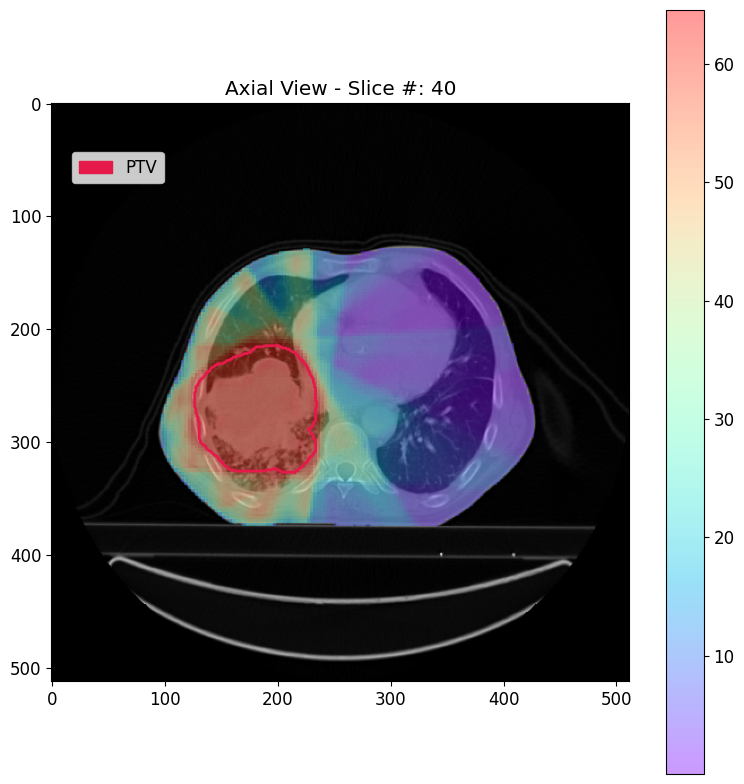

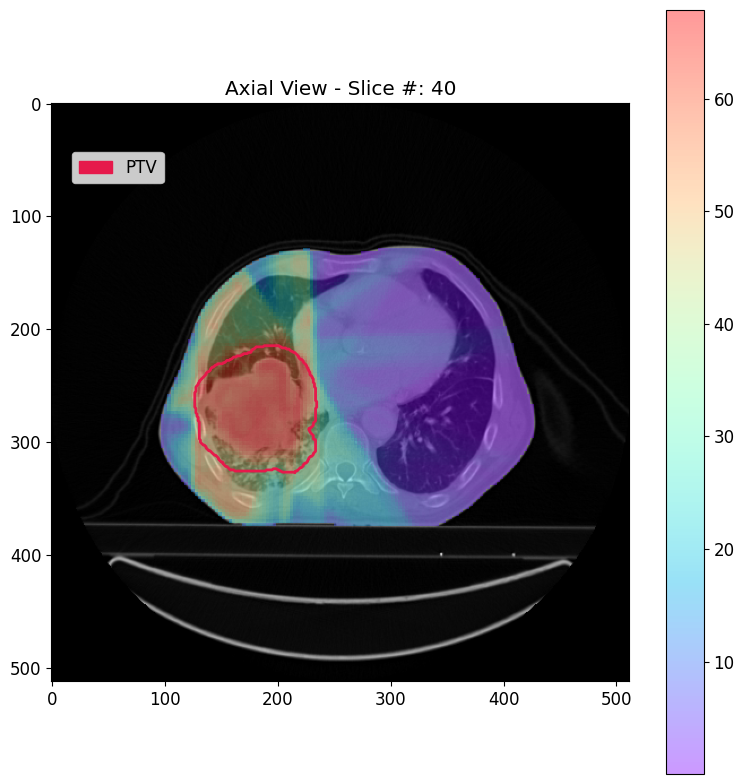

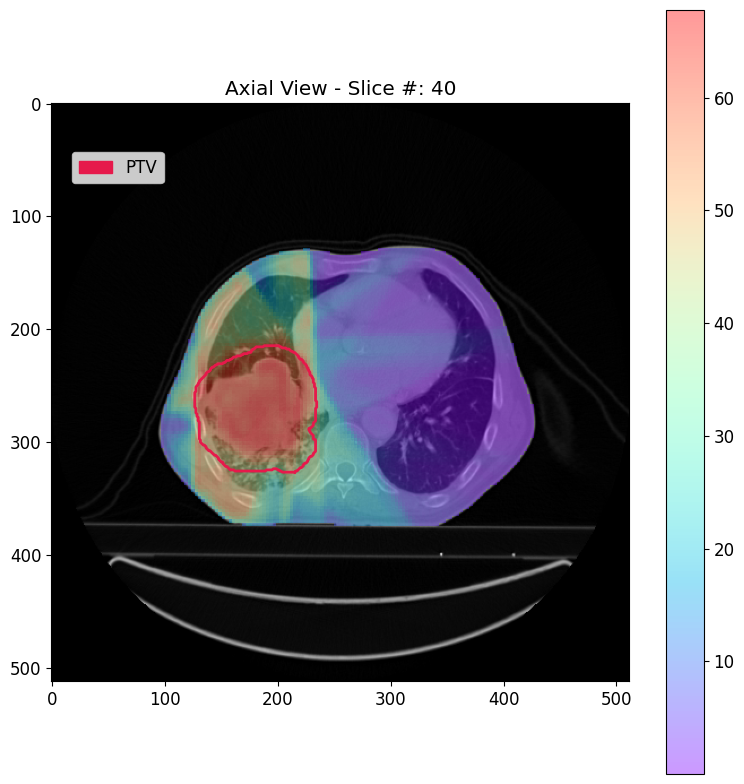

In [10]:
# plot 2d axial slice for the given solution and display the structures contours on the slice
pp.Visualize.plot_2d_dose(my_plan, sol=sol, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim_only, show_isodose=False, slice_num=40, structs=['PTV'])

In [9]:
# visualize plan metrics based upon clinical criteria
pp.Visualize.plan_metrics(my_plan, sol=sol)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim_only)


C:\Users\JhanwarG\Anaconda3\lib\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html


C:\Users\JhanwarG\Anaconda3\lib\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html


C:\Users\JhanwarG\Anaconda3\lib\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html
